<font size="5">Seat belt law data</font>

In [1]:
state_law_year = {'Alabama':1991, 'Alaska':1990, 'Arizona':1991,'Arkansas':1991,'California':1986,'Colorado':1987,
                  'Connecticut':1986,'Delaware':1992,'District of Columbia':1985,'Florida':1986,'Georgia':1988,
                 'Hawaii':1985,'Idaho':1986,'Illinois':1988,'Indiana':1987,'Iowa':1986,'Kansas':1986,'Kentucky':1994,
                 'Louisiana':1986,'Maine':1995,'Maryland':1986,'Massachusetts':1994,'Michigan':1985,'Minnesota':1986,
                 'Mississippi':1994, 'Missouri':1985,'Montana':1987,'Nebraska':1993,'Nevada':1987,'New Hampshire':1997,
                 'New Jersey':1985,'New Mexico':1986,'New York':1984,'North Carolina':1985,'North Dakota':1994,
                  'Ohio':1986,'Oklahoma':1987,'Oregon':1990,'Pennsylvania':1987,'Rhode Island':1991,'South Carolina':1989,
                 'South Dakota':1995,'Tennessee':1986,'Texas':1985,'Utah':1986,'Vermont':1994,'Virginia':1988,'Wake Island':2002,
                 'Washington':1986,'West Virginia':1993,'Wisconsin':1987,'Wyoming':1989}

Text(0.5, 1.0, 'Seat belt law legalization by year')

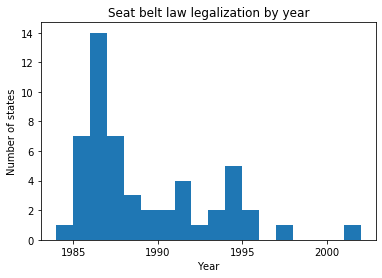

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xticks(range(1985,2005,5))
plt.xlabel('Year')
plt.ylabel('Number of states')
plt.hist(list(state_law_year.values()),bins=18)
plt.title('Seat belt law legalization by year')

<font size="5">Transportation death data</font>

In [3]:
import pandas as pd
df = pd.read_excel('C:\\Users\\alons\\Documents\\technion\\Causual_Inference\\project\\death_data.xlsx',header=None)

In [4]:
import os 
transport_deaths_state = pd.DataFrame(columns=['location_id','location_name','FIPS','state','year_id','mx'])
transport_deaths_county = pd.DataFrame(columns=['location_id','location_name','FIPS','state','year_id','mx'])
for state_file in os.listdir('C:\\Users\\alons\\Documents\\technion\\Causual_Inference\\project\\death_data'):
    df = pd.read_csv('C:\\Users\\alons\\Documents\\technion\\Causual_Inference\\project\\death_data\\'+state_file)
    df = df[(df['cause_id']==688)&(df['sex_id']==3)]
    df['state'] = list(df['location_name'])[0]
    df = df[['location_id','location_name','FIPS','state','year_id','mx']]
    state_df = df[df['location_name']==df['state']]
    county_df = df[df['location_name']!=df['state']]
    transport_deaths_state = transport_deaths_state.append(state_df, ignore_index=True)
    transport_deaths_county = transport_deaths_county.append(county_df, ignore_index=True)

<Figure size 1440x720 with 0 Axes>

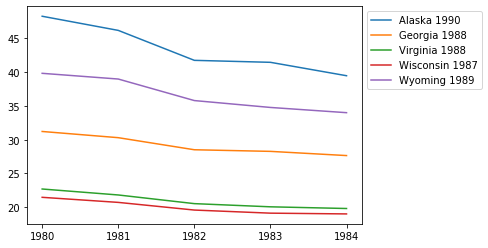

<Figure size 1440x720 with 0 Axes>

In [5]:
# Choose states randomly and plot transportation death rates
import matplotlib.pyplot as plt
import numpy as np
grouped_states = transport_deaths_state.groupby('state')
for group_name, df_group in grouped_states:
    if np.random.uniform()>0.9:
        law_year = state_law_year[group_name]
        plt.plot(df_group['year_id'][:5],df_group['mx'][:5],label=group_name+' '+str(law_year))
plt.xticks([1980,1981,1982,1983,1984])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.figure(figsize=(20,10))



In [6]:
transport_deaths_county['FIPS'] = transport_deaths_county['FIPS'].astype(str)

In [7]:
transport_deaths_county['mx'].describe()

count    109935.000000
mean         28.385726
std          10.052899
min           4.523160
25%          21.531337
50%          27.748555
75%          34.414756
max         132.444118
Name: mx, dtype: float64

<font size="5">Covariates data</font>

In [8]:
rural_urban_data = pd.read_csv('./rural_urban.csv')
rural_urban_data['FIPS'] = rural_urban_data['FIPS'].astype(int).astype(str) 
rural_urban_data = rural_urban_data[['FIPS','1983 Rural-urban Continuum Code']]
rural_urban_data.columns = ['FIPS','Rural-urban']

In [9]:
education_data = pd.read_csv('./Education.csv', skiprows=4)
education_data = education_data[['FIPS Code','State','Area name', 'Percent of adults with less than a high school diploma, 1980','Percent of adults with a high school diploma only, 1980','Percent of adults completing four years of college or higher, 1980']]
education_data.columns = ['FIPS','State','Area name','less_than_high_school_diploma','high_school_diploma_only','four_years_of_college'] 
education_data['FIPS'] = education_data['FIPS'].astype(str)

In [10]:
race_data = pd.read_csv('race_data.csv',skiprows=5)
race_data = race_data[['FIPS State and County Codes','Race/Sex Indicator','sum']].dropna()
race_data['FIPS State and County Codes'] = race_data['FIPS State and County Codes'].astype(int).astype(str) 
race_data = pd.pivot_table(race_data,index = 'FIPS State and County Codes', columns=race_data.groupby(['FIPS State and County Codes']).cumcount().add(1),values=['sum'])
race_data.columns = ['White male','White female','Black male','Black female','Other races male','Other races female']


In [11]:
race_data['white'] = race_data['White male']+race_data['White female']
race_data['black'] = race_data['Black male']+race_data['Black female']
race_data['other_races'] = race_data['Other races male']+race_data['Other races female']
race_data['total_population'] = race_data['white'] + race_data['black'] + race_data['other_races'] 
race_data['white%'] = race_data['white']/(race_data['white']+race_data['black']+race_data['other_races'])
race_data['black%'] = race_data['black']/(race_data['white']+race_data['black']+race_data['other_races'])
race_data['other_races%'] = race_data['other_races']/(race_data['white']+race_data['black']+race_data['other_races'])


In [12]:
race_data = race_data[['white%','black%','other_races%','total_population']]
race_data['FIPS'] = race_data.index
race_data = race_data.reset_index(drop=True)

In [13]:
income_data = pd.read_csv('income_data.csv',skiprows=1)
income_data = income_data[['StateCounty','GINI','COUNTY.1']]
income_data.columns = ['FIPS','GINI','mean_income']
income_data = income_data.dropna()
income_data['FIPS'] = income_data['FIPS'].astype(int).astype(str)
income_data['mean_income'] = income_data['mean_income'].astype(float)

<font size="5">Join and process county datasets</font>

In [14]:
data = pd.merge(transport_deaths_county, education_data, on='FIPS', how='left')
data = pd.merge(data, rural_urban_data, on='FIPS', how='left')
data = pd.merge(data, race_data, on='FIPS', how='left')
data = pd.merge(data,income_data,on='FIPS',how='left')

In [15]:
# Only counties with big enough population
data = data[data['total_population']>15000]

In [16]:
data[data['year_id']==1986].describe()

,mx,less_than_high_school_diploma,high_school_diploma_only,four_years_of_college,Rural-urban,white%,black%,other_races%,total_population,GINI,mean_income
count,1974.000000,1973.000000,1973.000000,1973.000000,1974.000000,1974.000000,1974.000000,1974.000000,1.974000e+03,1974.000000,1974.000000
mean,28.265568,39.352357,35.126508,12.293512,4.614995,0.890786,0.094480,0.014734,1.091136e+05,0.421355,31485.112969
std,8.170480,11.738335,6.919746,5.738263,2.315618,0.140911,0.137165,0.045718,2.896535e+05,0.036387,7532.295136
min,11.583530,5.800000,14.200000,3.900000,0.000000,0.153176,0.000000,0.000333,1.501700e+04,0.300186,14546.000000
25%,22.528194,31.100000,29.600000,8.400000,2.000000,0.845753,0.003635,0.002911,2.345450e+04,0.397458,26702.000000
50%,27.598442,37.700000,35.500000,10.700000,5.000000,0.954689,0.026996,0.004986,3.885250e+04,0.418465,29904.500000
75%,33.273961,48.700000,40.400000,14.700000,7.000000,0.988043,0.132717,0.011104,8.426250e+04,0.444059,34401.500000
max,96.819607,73.400000,52.400000,47.800000,9.000000,0.998823,0.842523,0.750660,7.502452e+06,0.586718,70918.000000


Text(0, 0.5, 'Number of counties')

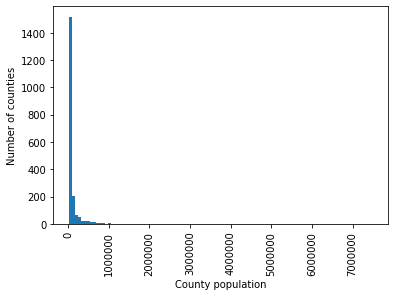

In [17]:
plt.hist(data[(data['year_id']==1986)]['total_population'],bins=100)
plt.xticks(rotation='vertical')
plt.xlabel('County population')
plt.ylabel('Number of counties')

In [18]:
pd.set_option("display.max_rows", 1000)

In [19]:
data = data.dropna()
data.rename(columns={'mx':'death_rate'}, inplace=True)

In [20]:
data['next_year_death_rate'] = data['death_rate'].shift(-1)
data['1_years_back'] = data['death_rate'].shift(1)
data['2_years_back'] = data['death_rate'].shift(2)
data['3_years_back'] = data['death_rate'].shift(3)
data['4_years_back'] = data['death_rate'].shift(4)
data['5_years_back'] = data['death_rate'].shift(5)


In [21]:
data['1_years_back'] = data[['1_years_back','year_id']].apply(lambda x:x[0] if x[1]>=1981 else None,axis=1)
data['2_years_back'] = data[['2_years_back','year_id']].apply(lambda x:x[0] if x[1]>=1982 else None,axis=1)
data['3_years_back'] = data[['3_years_back','year_id']].apply(lambda x:x[0] if x[1]>=1983 else None,axis=1)
data['4_years_back'] = data[['4_years_back','year_id']].apply(lambda x:x[0] if x[1]>=1984 else None,axis=1)
data['5_years_back'] = data[['5_years_back','year_id']].apply(lambda x:x[0] if x[1]>=1985 else None,axis=1)

In [22]:
data['next_year_death_rate'] = data[['next_year_death_rate','year_id']].apply(lambda x:x[0] if x[1]<2014 else None,axis=1)

In [23]:
data['is_treatment'] = data[['state','year_id']].apply(lambda x:1 if state_law_year[x[0]]==x[1] else 0,axis=1)
data['is_control'] = data[['state','year_id']].apply(lambda x:1 if state_law_year[x[0]]>=x[1]+2 else 0,axis=1)

In [24]:
len(data[data['is_control']==1])

13054

In [25]:
len(data[data['is_treatment']==1])

1973

In [26]:
data = data[(data['is_treatment']==1)|(data['is_control']==1)]

<font size="5">Check overlap</font>

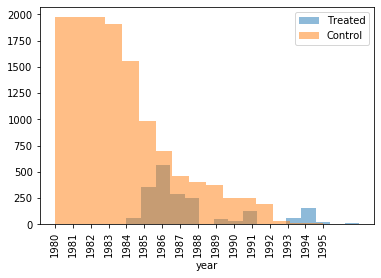

In [27]:
plt.hist(data[data['is_treatment']==1]['year_id'].astype(int),label='Treated',alpha=0.5,bins=len(range(1980,1996)))
plt.hist(data[data['is_control']==1]['year_id'].astype(int),label='Control',alpha=0.5,bins=len(range(1980,1996)))
plt.xticks(range(1980,1996),rotation='vertical')
plt.xlabel('year')
plt.legend()

In [28]:
#Filter none overlap years
data = data[(data['year_id']>1984)&(data['year_id']<1989)]

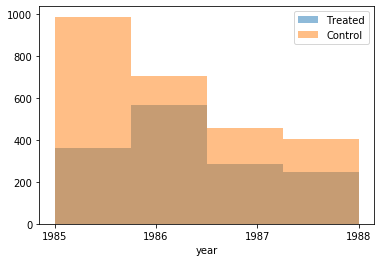

In [29]:
plt.hist(data[data['is_treatment']==1]['year_id'].astype(int),label='Treated',alpha=0.5,bins=4)
plt.hist(data[data['is_control']==1]['year_id'].astype(int),label='Control',alpha=0.5,bins=4)
plt.xticks([1985,1986,1987,1988])
plt.xlabel('year')
plt.legend()

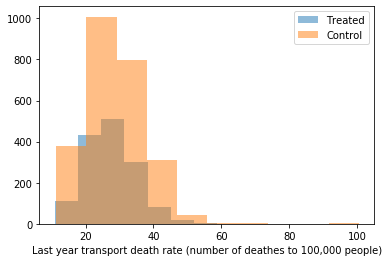

In [30]:
plt.hist(data[data['is_treatment']==1]['1_years_back'],label='Treated',alpha=0.5)
plt.hist(data[data['is_control']==1]['1_years_back'],label='Control',alpha=0.5)
plt.xlabel('Last year transport death rate (number of deathes to 100,000 people)')
plt.legend()

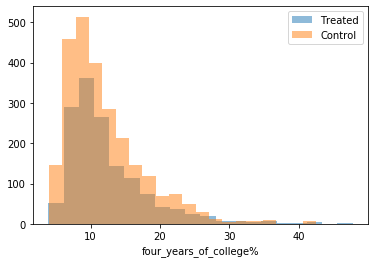

In [31]:
plt.hist(data[data['is_treatment']==1]['four_years_of_college'],label='Treated',alpha=0.5,bins=20)
plt.hist(data[data['is_control']==1]['four_years_of_college'],label='Control',alpha=0.5,bins=20)
plt.xlabel('four_years_of_college%')
plt.legend()

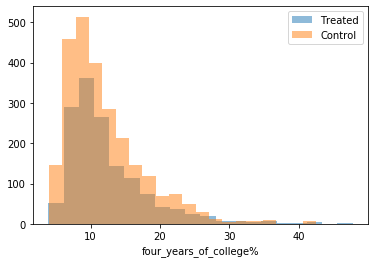

In [32]:
plt.hist(data[data['is_treatment']==1]['four_years_of_college'],label='Treated',alpha=0.5,bins=20)
plt.hist(data[data['is_control']==1]['four_years_of_college'],label='Control',alpha=0.5,bins=20)
plt.xlabel('four_years_of_college%')
plt.legend()

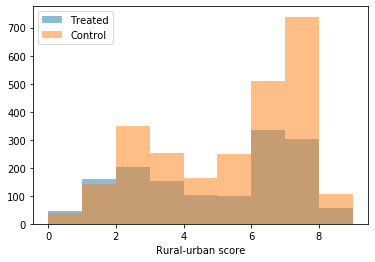

In [33]:
plt.hist(data[data['is_treatment']==1]['Rural-urban'],label='Treated',alpha=0.5,bins=9)
plt.hist(data[data['is_control']==1]['Rural-urban'],label='Control',alpha=0.5,bins=9)
plt.xlabel('Rural-urban score')
plt.legend()

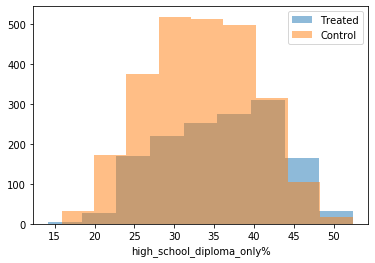

In [34]:
plt.hist(data[data['is_treatment']==1]['high_school_diploma_only'],label='Treated',alpha=0.5,bins=9)
plt.hist(data[data['is_control']==1]['high_school_diploma_only'],label='Control',alpha=0.5,bins=9)
plt.xlabel('high_school_diploma_only%')
plt.legend()

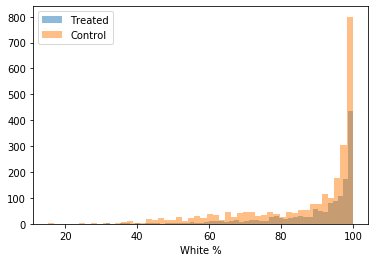

In [35]:
plt.hist(data[data['is_treatment']==1]['white%']*100,label='Treated',alpha=0.5,bins=50)
plt.hist(data[data['is_control']==1]['white%']*100,label='Control',alpha=0.5,bins=50)
plt.xlabel('White %')
plt.legend()

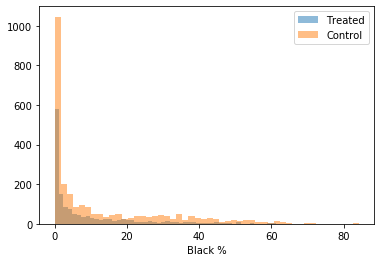

In [36]:
plt.hist(data[data['is_treatment']==1]['black%']*100,label='Treated',alpha=0.5,bins=50)
plt.hist(data[data['is_control']==1]['black%']*100,label='Control',alpha=0.5,bins=50)
plt.xlabel('Black %')
plt.legend()

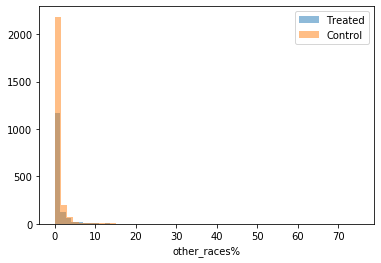

In [37]:
plt.hist(data[data['is_treatment']==1]['other_races%']*100,label='Treated',alpha=0.5,bins=50)
plt.hist(data[data['is_control']==1]['other_races%']*100,label='Control',alpha=0.5,bins=50)
plt.xlabel('other_races%')
plt.legend()

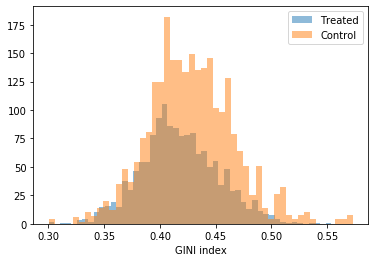

In [38]:
plt.hist(data[data['is_treatment']==1]['GINI'],label='Treated',alpha=0.5,bins=50)
plt.hist(data[data['is_control']==1]['GINI'],label='Control',alpha=0.5,bins=50)
plt.xlabel('GINI index')
plt.legend()

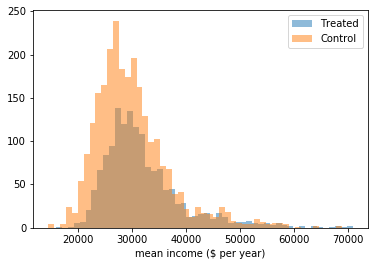

In [39]:
plt.hist(data[data['is_treatment']==1]['mean_income'],label='Treated',alpha=0.5,bins=50)
plt.hist(data[data['is_control']==1]['mean_income'],label='Control',alpha=0.5,bins=50)
plt.xlabel('mean income ($ per year)')
plt.legend()

In [40]:
# Filter none overlap death rates
data = data[(data['1_years_back']<60)&(data['2_years_back']<60)&(data['3_years_back']<60)&(data['4_years_back']<60)&(data['5_years_back']<60)]


In [41]:
data = pd.get_dummies(data,columns=['year_id'])
data['normalized_mean_income'] = (data['mean_income']-data['mean_income'].mean())/(data['mean_income'].std())

In [42]:
len(data)

3991

In [43]:
len(data[data['is_treatment']==1])

1452

In [44]:
len(data[data['is_treatment']==0])

2539

In [45]:
pd.set_option("display.max_columns",50)

In [46]:
data.columns

Index(['location_id', 'location_name', 'FIPS', 'state', 'death_rate', 'State',
       'Area name', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'four_years_of_college', 'Rural-urban',
       'white%', 'black%', 'other_races%', 'total_population', 'GINI',
       'mean_income', 'next_year_death_rate', '1_years_back', '2_years_back',
       '3_years_back', '4_years_back', '5_years_back', 'is_treatment',
       'is_control', 'year_id_1985', 'year_id_1986', 'year_id_1987',
       'year_id_1988', 'normalized_mean_income'],
      dtype='object')

<font size="5">Inverse propensity weighting</font>

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
def calculate_IPW(e, t, y):
    numerator_1 = 0
    numerator_2 = 0
    denomintator_1 = 0
    denomintator_2 = 0
    for i in range(len(e)):
        numerator_1 += t[i]*y[i]
        denomintator_1 += t[i]
        numerator_2 += (1-t[i])*y[i]*(e[i]/(1-e[i]))
        denomintator_2 += (1-t[i])*(e[i]/(1-e[i]))
    att = (numerator_1/denomintator_1) - (numerator_2/denomintator_2)
    return att

In [49]:

X = data[['less_than_high_school_diploma','high_school_diploma_only', 'four_years_of_college', 'Rural-urban',
               'white%', 'black%', 'other_races%','GINI','normalized_mean_income','1_years_back', '2_years_back', '3_years_back',
               '4_years_back', '5_years_back','year_id_1985','year_id_1986','year_id_1987','year_id_1988']].values
T = data['is_treatment'].values
# weights = np.log(data['total_population'].values)
lr = LogisticRegression(random_state=0)
lr.fit(X, T) #sample_weight=weights)

C:\Users\alons\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
propensity_score = list(lr.predict_proba(X)[:,1])
propensity_score_treated = [score for score,treatment in zip(propensity_score,T) if treatment==1]
propensity_score_control = [score for score,treatment in zip(propensity_score,T) if treatment==0]

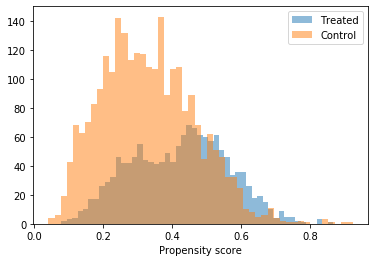

In [51]:
plt.hist(propensity_score_treated,label='Treated',alpha=0.5,bins=50)
plt.hist(propensity_score_control,label='Control',alpha=0.5,bins=50)
plt.xlabel('Propensity score')
plt.legend()

In [52]:
min(propensity_score)

0.040588906254211396

In [53]:
max(propensity_score)

0.923841130751886

In [54]:
calculate_IPW(propensity_score,T,list(data['next_year_death_rate'].values))

-0.2924803024700857

Text(0, 0.5, 'Bin proportion of true outcomes ')

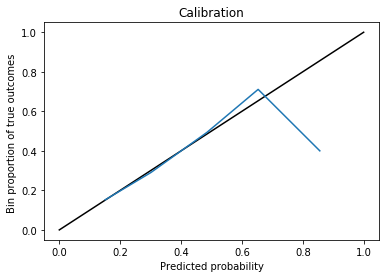

In [55]:
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines
proportion, Predicted_probability= calibration_curve(T,propensity_score,n_bins=5)
fig, ax = plt.subplots()
line = mlines.Line2D([0, 1], [0, 1], color='black')
ax.add_line(line)
plt.title('Calibration')
plt.plot(Predicted_probability,proportion)
plt.xlabel('Predicted probability')
plt.ylabel('Bin proportion of true outcomes ')

<font size="5"> S -learner </font>

In [56]:
from sklearn.linear_model import LinearRegression
X = data[['less_than_high_school_diploma','high_school_diploma_only', 'four_years_of_college', 'Rural-urban',
               'white%', 'black%', 'other_races%','GINI','normalized_mean_income','1_years_back', '2_years_back', '3_years_back',
               '4_years_back', '5_years_back','year_id_1985','year_id_1986','year_id_1987','year_id_1988','is_treatment']]
Y = data['next_year_death_rate']

lin_model = LinearRegression()
lin_model.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_true_treated = data[data['is_treatment']==1]['next_year_death_rate']
counterfectual_treated = X[X['is_treatment']==1]
counterfectual_treated['is_treatment'] = 0
y_counterfectual_pred = lin_model.predict(counterfectual_treated)
sum(y_true_treated - y_counterfectual_pred)/len(y_true_treated)

C:\Users\alons\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


-0.13833766710833878

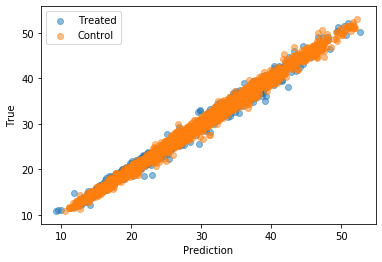

In [58]:

y_pred_treated = lin_model.predict(X[X['is_treatment']==1])
y_true_treated = data[data['is_treatment']==1]['next_year_death_rate']
y_pred_control = lin_model.predict(X[X['is_treatment']==0])
y_true_control = data[data['is_treatment']==0]['next_year_death_rate']
plt.scatter(y_pred_treated, y_true_treated,alpha=0.5,label='Treated')
plt.scatter(y_pred_control,y_true_control,alpha=0.5,label='Control')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.legend()

In [59]:
from sklearn.metrics import r2_score

In [60]:
X = data[['less_than_high_school_diploma','high_school_diploma_only', 'four_years_of_college', 'Rural-urban',
               'white%', 'black%', 'other_races%','GINI','normalized_mean_income','1_years_back', '2_years_back', '3_years_back',
               '4_years_back', '5_years_back','year_id_1985','year_id_1986','year_id_1987','year_id_1988','is_treatment']]
Y = data['next_year_death_rate']
T = data['is_treatment']
for column in X.columns:
    if column == 'is_treatment':
        continue
    X[column+'_new'] = X[column] * T
lin_model = LinearRegression()
lin_model.fit(X,Y)

true_treated = data[data['is_treatment']==1]['next_year_death_rate']
couterfectual_treated = X[X['is_treatment']==1]
for column in couterfectual_treated.columns:
    if column == 'is_treatment':
        couterfectual_treated[column] = 0
    elif '_new' in column:
        couterfectual_treated[column] = 0
prediction_counterfectual_treated = lin_model.predict(couterfectual_treated)
(sum(true_treated-prediction_counterfectual_treated))/len(true_treated)

C:\Users\alons\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\alons\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\alons\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

-0.13656518011365765

In [61]:
y_true = list(Y)
y_pred = lin_model.predict(X)
r2_score([i - j for i, j in zip(y_true, list(data['1_years_back']))],[i - j for i, j in zip(y_pred, list(data['1_years_back']))])

0.4101418579364938

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error([i - j for i, j in zip(y_true, list(data['1_years_back']))],[i - j for i, j in zip(y_pred, list(data['1_years_back']))])

0.586201870520368

In [63]:
y_true = list(Y)
y_pred = lin_model.predict(X)
r2_score(y_true,y_pred)

0.9910687422305332

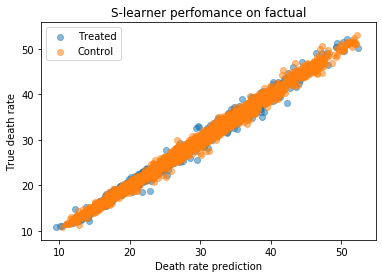

In [64]:

y_pred_treated = lin_model.predict(X[X['is_treatment']==1])
y_true_treated = data[data['is_treatment']==1]['next_year_death_rate']
y_pred_control = lin_model.predict(X[X['is_treatment']==0])
y_true_control = data[data['is_treatment']==0]['next_year_death_rate']
plt.scatter(y_pred_treated, y_true_treated,alpha=0.5,label='Treated')
plt.scatter(y_pred_control,y_true_control,alpha=0.5,label='Control')
plt.title('S-learner perfomance on factual')
plt.xlabel('Death rate prediction')
plt.ylabel('True death rate')
plt.legend()

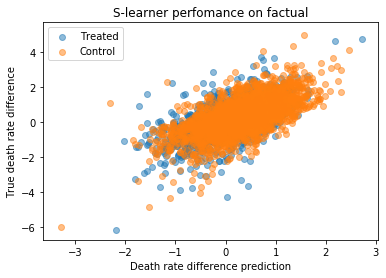

In [67]:
plt.scatter(y_pred_treated-list(X[X['is_treatment']==1]['1_years_back']), y_true_treated-list(X[X['is_treatment']==1]['1_years_back']),alpha=0.5,label='Treated')
plt.scatter(y_pred_control-list(X[X['is_treatment']==0]['1_years_back']),y_true_control-list(X[X['is_treatment']==0]['1_years_back']),alpha=0.5,label='Control')
plt.title('S-learner perfomance on factual')
plt.xlabel('Death rate difference prediction')
plt.ylabel('True death rate difference')
plt.legend()

<font size="5"> T -learner </font>

In [68]:
data_pos = data[data['is_treatment']==1]
data_neg = data[data['is_treatment']==0]
X_pos = data_pos[['less_than_high_school_diploma','high_school_diploma_only', 'four_years_of_college', 'Rural-urban',
               'white%', 'black%', 'other_races%','GINI','normalized_mean_income','1_years_back', '2_years_back', '3_years_back',
               '4_years_back', '5_years_back','year_id_1985','year_id_1986','year_id_1987','year_id_1988']]
y_pos = data_pos['next_year_death_rate']
X_neg = data_neg[['less_than_high_school_diploma','high_school_diploma_only', 'four_years_of_college', 'Rural-urban',
               'white%', 'black%', 'other_races%','GINI','normalized_mean_income','1_years_back', '2_years_back', '3_years_back',
               '4_years_back', '5_years_back','year_id_1985','year_id_1986','year_id_1987','year_id_1988']]
y_neg = data_neg['next_year_death_rate']


In [69]:
from sklearn.ensemble import RandomForestRegressor
random_forest_pos = RandomForestRegressor(random_state=0,n_estimators=100)
random_forest_neg = RandomForestRegressor(random_state=0,n_estimators=100)
random_forest_pos.fit(X_pos,y_pos)
random_forest_neg.fit(X_neg,y_neg)
y_pred_pos = random_forest_pos.predict(X_pos)
y_pred_pos_counterfectual = random_forest_neg.predict(X_pos)
y_pred_neg = random_forest_neg.predict(X_neg)
ATT = sum(y_pred_pos-y_pred_pos_counterfectual)/len(y_pred_pos)
ATT

-0.2076824071012446

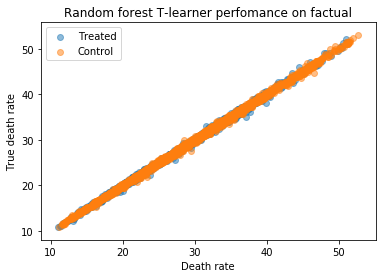

In [70]:
plt.scatter(y_pred_pos,y_pos,alpha=0.5,label='Treated')
plt.scatter(y_pred_neg,y_neg,alpha=0.5,label='Control')
plt.title('Random forest T-learner perfomance on factual')
plt.xlabel('Death rate')
plt.ylabel('True death rate')
plt.legend()

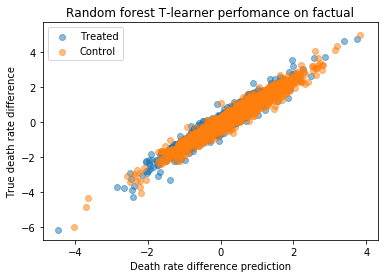

In [71]:
plt.scatter(y_pred_pos-list(X_pos['1_years_back']),y_pos-list(X_pos['1_years_back']),alpha=0.5,label='Treated')
plt.scatter(y_pred_neg-list(X_neg['1_years_back']),y_neg-list(X_neg['1_years_back']),alpha=0.5,label='Control')
plt.title('Random forest T-learner perfomance on factual')
plt.xlabel('Death rate difference prediction')
plt.ylabel('True death rate difference')
plt.legend()

In [72]:
y_true_pos = y_pos-list(X_pos['1_years_back'])
y_true_neg = y_neg-list(X_neg['1_years_back'])
(r2_score(y_true_pos,y_pred_pos-list(X_pos['1_years_back']))+r2_score(y_true_neg,y_pred_neg-list(X_neg['1_years_back'])))/2

0.900723271125863

In [73]:
(mean_squared_error(y_true_pos,y_pred_pos-list(X_pos['1_years_back']))+mean_squared_error(y_true_neg,y_pred_neg-list(X_neg['1_years_back'])))/2

0.0965677026056311

<font size="5">Difference in Differences: counties </font>

In [74]:
data_did = pd.get_dummies(data,columns=['state'])
relevent_columns = []
for column in data_did.columns:
    if ('state_' in column) or ('year_id_' in column):
        relevent_columns.append(column)
relevent_columns.append('is_treatment')
X = data_did[relevent_columns]
Y = data_did['next_year_death_rate']

In [75]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X,Y)
lin_model.coef_[-1]

-0.30078125

In [76]:
confounding_columns = ['less_than_high_school_diploma','high_school_diploma_only', 'four_years_of_college', 'Rural-urban','white%', 'black%', 'other_races%','GINI','normalized_mean_income']
X = data_did[confounding_columns+relevent_columns]
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X,Y)
lin_model.coef_[-1]

-0.2996372170572066

In [77]:
data_filtered = data_did[(data_did['state_Arizona']==0)&(data_did['state_Alaska']==0)&(data_did['state_Illinois']==0)&(data_did['state_Nevada']==0)&(data_did['state_Hawaii']==0)&(data_did['state_Oregon']==0)&(data_did['state_Maryland']==0)]
X = data_filtered[relevent_columns]
Y = data_filtered['next_year_death_rate']
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X,Y)
lin_model.coef_[-1]

-0.430419921875

<font size="5">Difference in Differences: states </font>

In [78]:
transport_deaths_state

,location_id,location_name,FIPS,state,year_id,mx
0,523,Alabama,1,Alabama,1980,33.426771
1,523,Alabama,1,Alabama,1981,32.296804
2,523,Alabama,1,Alabama,1982,30.465967
3,523,Alabama,1,Alabama,1983,30.521845
4,523,Alabama,1,Alabama,1984,30.384598
...,...,...,...,...,...,...
1815,573,Wyoming,56,Wyoming,2010,23.933471
1816,573,Wyoming,56,Wyoming,2011,23.462332
1817,573,Wyoming,56,Wyoming,2012,22.816753
1818,573,Wyoming,56,Wyoming,2013,22.468736


In [79]:
transport_deaths_state.rename(columns={'mx':'death_rate'}, inplace=True)
transport_deaths_state['next_year_death_rate'] = transport_deaths_state['death_rate'].shift(-1)
transport_deaths_state['next_year_death_rate'] = transport_deaths_state[['next_year_death_rate','year_id']].apply(lambda x:x[0] if x[1]<2014 else None,axis=1)
transport_deaths_state['is_treatment'] = transport_deaths_state[['state','year_id']].apply(lambda x:1 if state_law_year[x[0]]==x[1] else 0,axis=1)
transport_deaths_state['is_control'] = transport_deaths_state[['state','year_id']].apply(lambda x:1 if state_law_year[x[0]]>=x[1]+2 else 0,axis=1)
transport_deaths_state = transport_deaths_state[(transport_deaths_state['year_id']>1984)&(transport_deaths_state['year_id']<1989)]
transport_deaths_state = transport_deaths_state[(transport_deaths_state['is_treatment']==1)|(transport_deaths_state['is_control']==1)]

In [80]:
state_data_did = pd.get_dummies(transport_deaths_state,columns=['state'])
relevent_columns = []
for column in state_data_did.columns:
    if ('state_' in column) or ('year_id_' in column):
        relevent_columns.append(column)
relevent_columns.append('is_treatment')
X = state_data_did[relevent_columns]
Y = state_data_did['next_year_death_rate']

lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X,Y)
lin_model.coef_[-1]

-0.4802177829073919

In [81]:
state_data_filtered = state_data_did[(state_data_did['state_Arizona']==0)&(state_data_did['state_Alaska']==0)&(state_data_did['state_Illinois']==0)&(state_data_did['state_Nevada']==0)&(state_data_did['state_Hawaii']==0)&(state_data_did['state_Oregon']==0)&(state_data_did['state_Maryland']==0)]
X = state_data_filtered[relevent_columns]
Y = state_data_filtered['next_year_death_rate']
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X,Y)
lin_model.coef_[-1]

-0.5295860779044368